In [5]:
using XLSX
using DataFrames, TimeSeries
using StatsPlots
using Plots
using LinearAlgebra
using CSV
using StatsBase
using GLM
using Distributions
include("../utils.jl")


print_percentiles (generic function with 3 methods)

In [34]:
columns = [:Date, :USA_Net, :World_ex_USA, :EM_Net, :ACWI_Net_PLN, :MwigTR, :WIG20TR, :B10YPL]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes_PLN"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_pln = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> from(x, Date(2002,12,01)) |>
            x -> percentchange(x, :log)

255×7 TimeArray{Float64, 2, Date, Matrix{Float64}} 2003-01-31 to 2024-03-31
┌────────────┬────────────┬──────────────┬─────────────┬──────────────┬─────────
│            │ USA_Net    │ World_ex_USA │ EM_Net      │ ACWI_Net_PLN │ MwigTR ⋯
├────────────┼────────────┼──────────────┼─────────────┼──────────────┼─────────
│ 2003-01-31 │ -0.0266749 │   -0.0406774 │ -0.00625046 │   -0.0317079 │  -0.04 ⋯
│ 2003-02-28 │ 0.00726988 │   0.00329481 │  -0.0052946 │   0.00510351 │ -0.001 ⋯
│ 2003-03-31 │  0.0562568 │    0.0279324 │   0.0184186 │    0.0430687 │  -0.00 ⋯
│ 2003-04-30 │ 0.00679028 │    0.0185517 │   0.0121064 │    0.0118412 │   0.03 ⋯
│ 2003-05-31 │  0.0259313 │    0.0343688 │   0.0432507 │    0.0300993 │   0.05 ⋯
│ 2003-06-30 │  0.0603436 │     0.072454 │    0.103591 │    0.0670022 │   0.01 ⋯
│ 2003-07-31 │ 0.00964655 │    0.0143379 │   0.0519813 │    0.0132941 │    0.1 ⋯
│ 2003-08-31 │  0.0445512 │    0.0519011 │   0.0912158 │    0.0495565 │    0.1 ⋯
│     ⋮      │     ⋮      │      

In [35]:
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Macro_month"; infer_eltypes=true))[:,[:Date, :USDPLN, :WIBOR3m, :CPIPLM, :Y10PL, :MWig40_dy]]
dropmissing!(data_df, disallowmissing=true)
macro_pl = data_df |> x -> TimeArray(x; timestamp = :Date)  |> x -> from(x,Date(2003,01,01)) 

200×5 TimeArray{Float64, 2, Date, Matrix{Float64}} 2007-08-31 to 2024-03-31
┌────────────┬─────────┬─────────┬────────┬─────────┬───────────┐
│            │ USDPLN  │ WIBOR3m │ CPIPLM │ Y10PL   │ MWig40_dy │
├────────────┼─────────┼─────────┼────────┼─────────┼───────────┤
│ 2007-08-31 │  2.8059 │  0.0503 │ -0.004 │ 0.05789 │   0.00668 │
│ 2007-09-30 │  2.6495 │   0.051 │  0.008 │   0.057 │   0.00778 │
│ 2007-10-31 │   2.508 │  0.0521 │  0.006 │ 0.05514 │   0.00775 │
│ 2007-11-30 │  2.4568 │  0.0556 │  0.007 │ 0.05777 │    0.0093 │
│ 2007-12-31 │  2.4465 │   0.057 │  0.003 │ 0.05916 │    0.0095 │
│ 2008-01-31 │  2.4312 │  0.0565 │  0.007 │ 0.05688 │     0.011 │
│ 2008-02-29 │  2.3123 │  0.0594 │  0.004 │ 0.05973 │    0.0118 │
│ 2008-03-31 │  2.2266 │  0.0615 │  0.004 │ 0.05971 │    0.0188 │
│     ⋮      │    ⋮    │    ⋮    │   ⋮    │    ⋮    │     ⋮     │
│ 2023-09-30 │ 4.36773 │  0.0577 │ -0.004 │ 0.05899 │   0.03415 │
│ 2023-10-31 │  4.2128 │  0.0566 │  0.003 │ 0.05654 │   0.03013 │


In [36]:
columns = [:Date, :ACWI_Net, :USA_Net, :World_ex_USA, :EM_Net]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_usd = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> percentchange(x, :log) |>
            x -> from(x, Date(2003,01,01))

255×4 TimeArray{Float64, 2, Date, Matrix{Float64}} 2003-01-31 to 2024-03-31
┌────────────┬─────────────┬────────────┬──────────────┬─────────────┐
│            │ ACWI_Net    │ USA_Net    │ World_ex_USA │ EM_Net      │
├────────────┼─────────────┼────────────┼──────────────┼─────────────┤
│ 2003-01-31 │  -0.0298776 │ -0.0248446 │   -0.0388471 │ -0.00442015 │
│ 2003-02-28 │  -0.0181007 │ -0.0159343 │   -0.0199094 │  -0.0284988 │
│ 2003-03-31 │ -0.00432387 │ 0.00886423 │   -0.0194601 │  -0.0289739 │
│ 2003-04-30 │   0.0849273 │  0.0798764 │    0.0916379 │   0.0851925 │
│ 2003-05-31 │   0.0559049 │  0.0517369 │    0.0601744 │   0.0690563 │
│ 2003-06-30 │   0.0185506 │   0.011892 │    0.0240024 │   0.0551391 │
│ 2003-07-31 │   0.0216391 │  0.0179915 │    0.0226828 │   0.0603263 │
│ 2003-08-31 │   0.0231143 │  0.0181089 │    0.0254588 │   0.0647735 │
│     ⋮      │      ⋮      │     ⋮      │      ⋮       │      ⋮      │
│ 2023-09-30 │   -0.042229 │ -0.0483353 │   -0.0342956 │  -0.0264995 │
│

In [37]:
returns_summarystats(returns_pln, 12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
USA_Net,0.1347,1.5289,0.1004,0.4178,-1.2983,0.0051,-0.2361,-0.014,0.3335,0.7454,0.1033
World_ex_USA,0.1188,1.0878,0.0722,0.3375,-1.227,-0.5023,-0.1221,0.0573,1.0008,0.6074,0.0787
EM_Net,0.1546,1.3323,0.0861,0.3766,-2.2655,-0.6946,-0.1961,0.0823,1.8558,0.5571,0.1184
ACWI_Net_PLN,0.121,1.2714,0.0879,0.3596,-1.2476,-0.3241,-0.1698,0.0111,0.6767,0.7263,0.0957
MwigTR,0.2181,2.403,0.1155,0.4835,-3.8898,-0.6628,-0.2993,0.1952,3.7443,0.5296,0.1475
WIG20TR,0.2199,2.2594,0.0705,0.594,-3.2019,-0.3645,-0.4047,0.0087,1.0945,0.3205,0.1144
B10YPL,0.0895,1.5024,0.0444,0.206,-1.0138,0.0388,-0.1158,0.0204,3.1919,0.4963,0.0604


In [38]:
returns_summarystats(returns_usd,12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
ACWI_Net,0.1566,1.3949,0.0859,0.4036,-2.65,-0.9343,-0.1938,0.0946,2.7364,0.5487,0.1571
USA_Net,0.1494,1.4788,0.0985,0.4065,-2.257,-0.7909,-0.1905,0.0391,1.8967,0.6593,0.1537
World_ex_USA,0.168,1.7129,0.0702,0.3971,-2.7986,-0.8513,-0.2294,0.1307,2.6166,0.4181,0.1466
EM_Net,0.2087,1.893,0.0842,0.553,-3.8371,-0.8236,-0.3169,0.1393,3.2059,0.4033,0.0995


In [39]:
ols = lm(@formula(USA_Net ~ MwigTR), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

USA_Net ~ 1 + MwigTR

Coefficients:
──────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error     t  Pr(>|t|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  0.00641188  0.00233119  2.75    0.0064  0.00182088  0.0110029
MwigTR       0.203303    0.0366745   5.54    <1e-07  0.131077    0.275529
──────────────────────────────────────────────────────────────────────────
0.1083063906939481


In [40]:
ols = lm(@formula(MwigTR ~ USA_Net), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error     t  Pr(>|t|)    Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.00516582  0.00381585  1.35    0.1770  -0.00234906  0.0126807
USA_Net      0.532734    0.0961017   5.54    <1e-07   0.343473    0.721996
───────────────────────────────────────────────────────────────────────────
0.1083063906939481


In [41]:
returns_lag = merge(returns_pln, TimeSeries.lead(returns_pln,1))
ols = lm(@formula(MwigTR ~  USA_Net_1 + USA_Net), returns_lag)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net_1 + USA_Net

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error     t  Pr(>|t|)    Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.00505084  0.00392574  1.29    0.1994  -0.00268075  0.0127824
USA_Net_1    0.0162215   0.0966403   0.17    0.8668  -0.174108    0.206551
USA_Net      0.533366    0.0965437   5.52    <1e-07   0.343227    0.723505
───────────────────────────────────────────────────────────────────────────
0.10844136312972164


In [42]:
ols = lm(@formula(World_ex_USA ~ MwigTR), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

World_ex_USA ~ 1 + MwigTR

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error     t  Pr(>|t|)     Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00334466  0.00187423  1.78    0.0755  -0.000346408  0.00703574
MwigTR       0.2775      0.0294855   9.41    <1e-17   0.219431     0.335568
─────────────────────────────────────────────────────────────────────────────
0.25931176486639196


In [43]:
ols = lm(@formula(EM_Net ~ MwigTR), returns_pln)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

EM_Net ~ 1 + MwigTR

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error     t  Pr(>|t|)    Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00371331  0.00244043  1.52    0.1294  -0.00109284  0.00851946
MwigTR       0.359752    0.0383932   9.37    <1e-17   0.284141    0.435363
────────────────────────────────────────────────────────────────────────────
0.2576312062759857


In [44]:
columns = [:Date, :USA_Net, :World_ex_USA, :EM_Net]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Indexes"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
returns_usd = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |> 
            x -> percentchange(x, :log)

435×3 TimeArray{Float64, 2, Date, Matrix{Float64}} 1988-01-31 to 2024-03-31
┌────────────┬────────────┬──────────────┬─────────────┐
│            │ USA_Net    │ World_ex_USA │ EM_Net      │
├────────────┼────────────┼──────────────┼─────────────┤
│ 1988-01-31 │  0.0410122 │    0.0153553 │   0.0935834 │
│ 1988-02-29 │  0.0401109 │    0.0640862 │   0.0031132 │
│ 1988-03-31 │ -0.0349774 │    0.0592025 │     0.10175 │
│ 1988-04-30 │ 0.00818061 │    0.0140195 │   0.0517417 │
│ 1988-05-31 │ 0.00760205 │   -0.0326806 │   0.0292525 │
│ 1988-06-30 │  0.0445733 │   -0.0229028 │   0.0331365 │
│ 1988-07-31 │ -0.0040323 │    0.0288082 │  -0.0260317 │
│ 1988-08-31 │  -0.035096 │   -0.0667177 │  -0.0274362 │
│     ⋮      │     ⋮      │      ⋮       │      ⋮      │
│ 2023-09-30 │ -0.0483353 │   -0.0342956 │  -0.0264995 │
│ 2023-10-31 │ -0.0235616 │   -0.0431263 │   -0.039629 │
│ 2023-11-30 │  0.0895259 │    0.0898198 │   0.0769883 │
│ 2023-12-31 │  0.0456572 │    0.0532219 │   0.0383487 │
│ 2024-01-31

In [45]:
data = merge(returns_pln[:MwigTR], returns_usd[:USA_Net])
ols = lm(@formula(USA_Net ~ MwigTR), data)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

USA_Net ~ 1 + MwigTR

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  0.00367412  0.00198719   1.85    0.0656  -0.00023942  0.00758766
MwigTR       0.470963    0.0312627   15.06    <1e-36   0.409395    0.532531
─────────────────────────────────────────────────────────────────────────────
0.47285673857874166


In [46]:
# number of month wig20 > mwig40

n_wig20Gr = values(returns_pln[:WIG20TR] .> returns_pln[:MwigTR])  |> count
n_wig20Gr / length(returns_pln)


0.47058823529411764

In [47]:
bond_excess = returns_pln[:B10YPL] .- rf ./ 23 |>
    x -> from(x, Date(2015,01,01)) |>
    x -> to(x,  Date(2019,12,31)) 

returns_summarystats(bond_excess,12)

UndefVarError: UndefVarError: `rf` not defined

In [48]:
variables= merge(returns_pln[:USA_Net, :MwigTR], TimeSeries.lead(returns_pln[:USA_Net, :MwigTR]), macro_pl[:WIBOR3m, :CPIPLM, :MWig40_dy], TimeSeries.lead(macro_pl[:WIBOR3m, :CPIPLM, :MWig40_dy], 1), log.(TimeSeries.lead(macro_pl[:MWig40_dy],1)))
colnames(variables)

11-element Vector{Symbol}:
 :USA_Net
 :MwigTR
 :USA_Net_1
 :MwigTR_1
 :WIBOR3m
 :CPIPLM
 :MWig40_dy
 :WIBOR3m_1
 :CPIPLM_1
 :MWig40_dy_1
 :MWig40_dy_2

In [49]:
ols = lm(@formula(MwigTR ~ MWig40_dy_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy_1

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0156113  0.00978799   1.59    0.1123  -0.00369137   0.034914
MWig40_dy_1  -0.543517   0.385743    -1.41    0.1604  -1.30423      0.217199
────────────────────────────────────────────────────────────────────────────
0.009977192877162144


In [50]:
ols = lm(@formula(MwigTR ~ MWig40_dy_2), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy_2

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0517075  0.0299636   -1.73    0.0860  -0.110798   0.00738299
MWig40_dy_2  -0.0139799  0.00754005  -1.85    0.0652  -0.0288495  0.000889673
─────────────────────────────────────────────────────────────────────────────
0.0171506453904694


In [51]:
ols = lm(@formula(MwigTR ~ MWig40_dy_1 + WIBOR3m_1 + CPIPLM_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy_1 + WIBOR3m_1 + CPIPLM_1

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0327325    0.012211   2.68    0.0080   0.00864989   0.0568152
MWig40_dy_1  -0.571674     0.38275   -1.49    0.1369  -1.32654      0.183187
WIBOR3m_1    -0.466034     0.221212  -2.11    0.0364  -0.90231     -0.029758
CPIPLM_1     -0.314899     0.86867   -0.36    0.7174  -2.02809      1.3983
─────────────────────────────────────────────────────────────────────────────
0.03658709151918704


In [52]:
ols = lm(@formula(MwigTR ~ MWig40_dy + WIBOR3m + CPIPLM), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MWig40_dy + WIBOR3m + CPIPLM

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)    Lower 95%   Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)   0.0256318   0.0122461   2.09    0.0376   0.00147998   0.0497837
MWig40_dy    -0.270922    0.382717   -0.71    0.4799  -1.02572      0.483875
WIBOR3m      -0.539226    0.222151   -2.43    0.0161  -0.977353    -0.101098
CPIPLM        0.574589    0.866285    0.66    0.5079  -1.1339       2.28308
─────────────────────────────────────────────────────────────────────────────
0.03097387311577282


In [53]:
ols = lm(@formula(MwigTR ~ USA_Net_1 + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLM_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net_1 + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLM_1

Coefficients:
────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0339399  0.0303752   -1.12    0.2652  -0.0938499  0.0259701
USA_Net_1    -0.0241344  0.115155    -0.21    0.8342  -0.251258   0.202989
MwigTR_1      0.162877   0.0757914    2.15    0.0329   0.0133917  0.312363
MWig40_dy_2  -0.0130343  0.00748843  -1.74    0.0833  -0.027804   0.00173534
WIBOR3m_1    -0.401719   0.223161    -1.80    0.0734  -0.841866   0.0384285
CPIPLM_1     -0.340294   0.861335    -0.40    0.6932  -2.03913    1.35855
───────────────────────────────────────────────────

In [54]:
ols = lm(@formula(MwigTR ~ USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLM_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m_1 + CPIPLM_1

Coefficients:
───────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)   Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  -0.042868  0.0281679   -1.52    0.1297  -0.0984244  0.0126885
USA_Net       0.535071  0.100848     5.31    <1e-06   0.336165   0.733978
MwigTR_1      0.16832   0.066261     2.54    0.0119   0.0376315  0.299009
MWig40_dy_2  -0.012387  0.00697844  -1.78    0.0775  -0.0261508  0.00137678
WIBOR3m_1    -0.18859   0.211123    -0.89    0.3728  -0.604995   0.227815
CPIPLM_1     -0.632898  0.805859    -0.79    0.4332  -2.22232    0.956523
──────────────────────────────────────────────────────────────

In [55]:
ols = lm(@formula(MwigTR ~ USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m + CPIPLM), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + USA_Net + MwigTR_1 + MWig40_dy_2 + WIBOR3m + CPIPLM

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error      t  Pr(>|t|)   Lower 95%    Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  -0.0454128  0.0281707   -1.61    0.1086  -0.100975   0.0101491
USA_Net       0.53117    0.100463     5.29    <1e-06   0.333024   0.729316
MwigTR_1      0.168966   0.065994     2.56    0.0112   0.0388042  0.299128
MWig40_dy_2  -0.0129419  0.00695648  -1.86    0.0643  -0.0266624  0.000778583
WIBOR3m      -0.309051   0.208714    -1.48    0.1403  -0.720704   0.102601
CPIPLM        0.84222    0.797751     1.06    0.2924  -0.73121    2.41565
──────────────────────────────────────────────────────

In [56]:
ols = lm(@formula(MwigTR ~ MwigTR_1), variables)
println(ols)
println(r2(ols))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

MwigTR ~ 1 + MwigTR_1

Coefficients:
───────────────────────────────────────────────────────────────────────────
                  Coef.  Std. Error     t  Pr(>|t|)    Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────────
(Intercept)  0.00257948  0.00430802  0.60    0.5500  -0.00591626  0.0110752
MwigTR_1     0.188414    0.0701444   2.69    0.0078   0.0500837   0.326744
───────────────────────────────────────────────────────────────────────────
0.0353307523248787


In [57]:
round.(cor(values(variables[:MwigTR, :USA_Net, :WIBOR3m, :CPIPLM, :MWig40_dy])), digits=2)

5×5 Matrix{Float64}:
  1.0    0.36  -0.16   0.0   -0.04
  0.36   1.0   -0.17  -0.07   0.03
 -0.16  -0.17   1.0    0.27  -0.05
  0.0   -0.07   0.27   1.0    0.02
 -0.04   0.03  -0.05   0.02   1.0

#### mwig dy eda

In [58]:
CSV.File("../data/mwig40price_dy.csv", delim=';')

70-element CSV.File:
 CSV.Row: (Date = String15("30.09.2007"), Mwig = String7("4568,14"), mWig_dy = String7("0,78%"), d = String15("35,5401292"), Column5 = String15("#ARG!"))
 CSV.Row: (Date = String15("31.12.2007"), Mwig = String7("4028,37"), mWig_dy = String7("0,95%"), d = String15("38,269515"), Column5 = String15("7,40%"))
 CSV.Row: (Date = String15("31.03.2008"), Mwig = String7("3363,11"), mWig_dy = String7("1,88%"), d = String15("63,226468"), Column5 = String15("50,21%"))
 CSV.Row: (Date = String15("30.06.2008"), Mwig = String7("2649,88"), mWig_dy = String7("0,97%"), d = String15("25,703836"), Column5 = String15("-90,01%"))
 CSV.Row: (Date = String15("30.09.2008"), Mwig = String7("2252,23"), mWig_dy = String7("1,61%"), d = String15("36,260903"), Column5 = String15("34,41%"))
 CSV.Row: (Date = String15("31.12.2008"), Mwig = String7("1511,27"), mWig_dy = String7("2,53%"), d = String15("38,235131"), Column5 = String15("5,30%"))
 CSV.Row: (Date = String15("31.03.2009"), Mwig = String7

In [59]:
mwig = TimeArray(CSV.File("../data/mwig40price_dy.csv", delim=';'), timestamp = :Date)

MethodError: MethodError: no method matching TimeArray(::Vector{Union{Missing, String15}}, ::Matrix{Union{Missing, String15}}, ::Vector{Symbol}, ::CSV.File; unchecked::Bool)

Closest candidates are:
  TimeArray(!Matched::AbstractVector{D}, ::AbstractArray{T, N}, ::Vector{Symbol}, ::Any; args...) where {T, N, D<:TimeType}
   @ TimeSeries C:\Users\matsz\.julia\packages\TimeSeries\zx7sJ\src\timearray.jl:89
  TimeArray(!Matched::D, ::AbstractArray{T, N}, ::Vector{Symbol}, ::Any; args...) where {T, N, D<:TimeType}
   @ TimeSeries C:\Users\matsz\.julia\packages\TimeSeries\zx7sJ\src\timearray.jl:94
  TimeArray(!Matched::AbstractVector{D}, ::AbstractArray{T, N}, !Matched::Vector{S}, ::Any; args...) where {T, N, D<:TimeType, S<:AbstractString}
   @ TimeSeries deprecated.jl:103
  ...


In [60]:
readtimearray("../data/mwig40price_dy.csv"; delim=';', format="dd/mm/yyyy")

ArgumentError: ArgumentError: Unable to parse date time. Expected directive Delim(/) at char 3

In [85]:
columns = [:Date, :USDPLN]
data_df = DataFrame(XLSX.readtable("../data/assets_data_03.24.xlsx", "Macro_month"; infer_eltypes=true))[2:end, columns]
dropmissing!(data_df, disallowmissing=true)
usdpln = data_df |> 
            x -> TimeArray(x; timestamp = :Date) |>             
            x -> percentchange(x, :log)

returns_summarystats(usdpln, 12)

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
USDPLN,0.1288,1.998,0.0045,0.2813,-1.1283,0.6829,-0.2977,0.061,1.7837,0.0351,-0.0231


In [86]:
returns_pln[:USA_Net]


255×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2003-01-31 to 2024-03-31
┌────────────┬────────────┐
│            │ USA_Net    │
├────────────┼────────────┤
│ 2003-01-31 │ -0.0266749 │
│ 2003-02-28 │ 0.00726988 │
│ 2003-03-31 │  0.0562568 │
│ 2003-04-30 │ 0.00679028 │
│ 2003-05-31 │  0.0259313 │
│ 2003-06-30 │  0.0603436 │
│ 2003-07-31 │ 0.00964655 │
│ 2003-08-31 │  0.0445512 │
│     ⋮      │     ⋮      │
│ 2023-09-30 │ 0.00929794 │
│ 2023-10-31 │ -0.0596775 │
│ 2023-11-30 │  0.0369425 │
│ 2023-12-31 │  0.0298131 │
│ 2024-01-31 │  0.0327042 │
│ 2024-02-29 │  0.0492852 │
│ 2024-03-31 │  0.0299082 │
└────────────┴────────────┘
           240 rows omitted

In [87]:
# US PLN acwi_scenarios
mean_us_pln = mean(values(returns_pln[:USA_Net])) .* 12
std_us_pln = std(values(returns_pln[:USA_Net])) .* 12^0.5
println(mean_us_pln)
println(std_us_pln)
scenarios_us_pln = rand(Normal(mean_us_pln, std_us_pln), 10_000, 15)
print_percentiles(scenarios_us_pln, [0.02, 0.25, 0.5, 0.75, 0.98])

0.10042156279368566
0.1347216700306306


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0.02,-0.1832,-0.1734,-0.1736,-0.1735,-0.1775,-0.1752,-0.1783,-0.1751,-0.1762,-0.1843,-0.1776,-0.173,-0.1757,-0.1841,-0.1818
0.25,0.0081,0.0071,0.0096,0.0128,0.0096,0.0092,0.0088,0.0078,0.0082,0.0079,0.0077,0.0067,0.0112,0.0105,0.0087
0.5,0.0994,0.0987,0.1017,0.1033,0.1021,0.0987,0.1013,0.0993,0.0996,0.1014,0.1004,0.0976,0.1039,0.1001,0.1012
0.75,0.1911,0.1904,0.192,0.1944,0.1894,0.1891,0.1906,0.1895,0.1888,0.1935,0.1922,0.188,0.1933,0.1916,0.1926
0.98,0.3738,0.3799,0.3836,0.3719,0.3678,0.3743,0.3777,0.3767,0.3745,0.3705,0.3816,0.3725,0.3726,0.3826,0.3752


In [88]:
#US USD
mean_us_usd = mean(values(returns_usd[:USA_Net][Date(2003,01,01):Date(2024,03,31)])) .* 12
std_us_usd = std(values(returns_usd[:USA_Net][Date(2003,01,01):Date(2024,03,31)])) .* 12^0.5
println(mean_us_usd)
println(std_us_usd)
scenarios_us_usd = rand(Normal(mean_us_usd, std_us_usd), 10_000, 15)
print_percentiles(scenarios_us_usd, [0.02, 0.25, 0.5, 0.75, 0.98])

0.09847987951285309
0.14936298492263203


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0.02,-0.2119,-0.2101,-0.1991,-0.2107,-0.2096,-0.2068,-0.2187,-0.2094,-0.2148,-0.2096,-0.2066,-0.2108,-0.2078,-0.2105,-0.2062
0.25,-0.0015,-0.002,-0.002,-0.0034,-0.0041,0.0002,-0.0053,-0.0023,-0.0038,-0.005,-0.0015,-0.0013,-0.0051,-0.0021,-0.0023
0.5,0.0982,0.1002,0.0992,0.0977,0.0966,0.0997,0.0967,0.0987,0.098,0.098,0.0978,0.0988,0.098,0.0987,0.0997
0.75,0.2008,0.1991,0.1986,0.196,0.1995,0.1984,0.1963,0.1995,0.1996,0.198,0.2017,0.1991,0.1961,0.201,0.1969
0.98,0.4067,0.4074,0.4095,0.3998,0.4108,0.4012,0.4042,0.407,0.4071,0.4079,0.4046,0.4095,0.4015,0.4023,0.4086


In [89]:
#USD_PLN
mean_usdpln = mean(values(usdpln[:USDPLN][Date(2003,01,01):Date(2024,03,31)])) .* 12
std_usdpln = std(values(usdpln[:USDPLN][Date(2003,01,01):Date(2024,03,31)])) .* 12^0.5
println(mean_usdpln)
println(std_usdpln)
scenarios_usdpln = rand(Normal(mean_usdpln, std_usdpln), 10_000, 15)
print_percentiles(scenarios_usdpln, [0.02, 0.25, 0.5, 0.75, 0.98])

0.001941683280832559
0.13377549414442894


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0.02,-0.2726,-0.2812,-0.2771,-0.2752,-0.2688,-0.2765,-0.2693,-0.2677,-0.2742,-0.2752,-0.2656,-0.2691,-0.2694,-0.2736,-0.2753
0.25,-0.0879,-0.0925,-0.0883,-0.0894,-0.0881,-0.0871,-0.0875,-0.0884,-0.0879,-0.0872,-0.0903,-0.0873,-0.088,-0.0863,-0.0896
0.5,0.0055,-0.0009,0.0,-0.0018,0.0025,0.0003,0.0035,0.0033,0.0017,0.0015,0.0002,0.0025,0.0031,0.0026,-0.0001
0.75,0.0921,0.0916,0.0918,0.0914,0.0927,0.0934,0.094,0.09,0.0905,0.0924,0.0903,0.0919,0.0896,0.0943,0.0912
0.98,0.2745,0.2799,0.2834,0.2826,0.2744,0.2794,0.2711,0.2697,0.2697,0.2817,0.2799,0.2785,0.272,0.2737,0.275


In [90]:
cov_us_usdpln = cov([values(usdpln[:USDPLN][Date(2003,01,01):Date(2024,03,31)]) values(returns_usd[:USA_Net][Date(2003,01,01):Date(2024,03,31)])])


2×2 Matrix{Float64}:
  0.00149132   -0.000918969
 -0.000918969   0.00185911

In [97]:
cor_us_usdpln = cor([values(usdpln[:USDPLN][Date(2003,01,01):Date(2024,03,31)]) values(returns_usd[:USA_Net][Date(2003,01,01):Date(2024,03,31)])])

2×2 Matrix{Float64}:
  1.0       -0.551903
 -0.551903   1.0

In [100]:
scenarios_merge = zeros(10_000,15,2)

for s in 1:10_000
    scenarios_merge[s,:,:] = rand(MvNormal([mean_usdpln, mean_us_usd], cov_us_usdpln),15)'
end

print_percentiles(dropdims(sum(scenarios_merge,dims=3),dims=3), [0.02, 0.25, 0.5, 0.75, 0.98])


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0.02,0.0214,0.0199,0.0209,0.0208,0.0201,0.021,0.0208,0.0215,0.0209,0.0199,0.0194,0.0189,0.0185,0.0214,0.0215
0.25,0.0746,0.074,0.0749,0.0742,0.0747,0.0742,0.0745,0.0744,0.0749,0.0743,0.0733,0.0744,0.0739,0.0742,0.0742
0.5,0.1003,0.1003,0.1004,0.0998,0.1008,0.1006,0.1005,0.1013,0.1009,0.1007,0.1003,0.1002,0.0998,0.1003,0.1001
0.75,0.1273,0.127,0.1274,0.1266,0.127,0.127,0.1269,0.1268,0.1269,0.1265,0.1263,0.126,0.1259,0.127,0.1261
0.98,0.1802,0.1809,0.1799,0.1817,0.1813,0.181,0.1808,0.1786,0.181,0.1794,0.1808,0.1802,0.1795,0.1812,0.1802


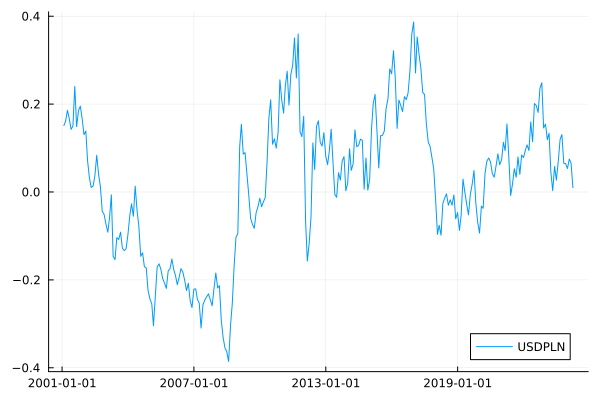

In [94]:
usdpln_roll = expm1.(moving(sum, usdpln, 36))
plot(usdpln_roll)